## Text stats

# articles 17784
num of sentence DescribeResult(nobs=17784, minmax=(1, 1120), mean=97.4389901034638, variance=13112.281381333987, skewness=2.650982712771727, kurtosis=9.415601323082502)
length sentence DescribeResult(nobs=1732855, minmax=(0, 2133), mean=19.28675394075096, variance=147.8623646923394, skewness=4.241380846561955, kurtosis=536.5729303357492)


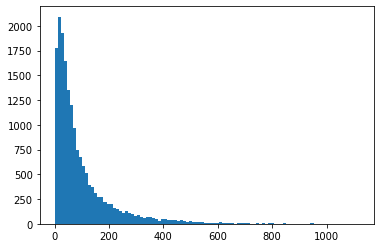

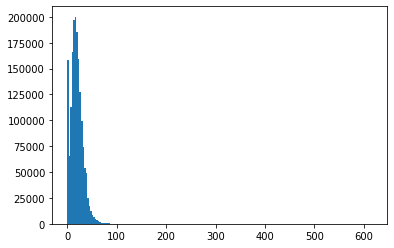

statement2num_sentences: DescribeResult(nobs=206682, minmax=(1, 7), mean=1.0750234660009097, variance=0.1332037591079485, skewness=6.530971119423775, kurtosis=55.41688618592419)
count positive sentence pair per example DescribeResult(nobs=84299, minmax=(1, 9471), mean=10.685239445307774, variance=4537.482836407053, skewness=52.78061178431171, kurtosis=5385.116728493706)
sentence position DescribeResult(nobs=211844, minmax=(0, 857), mean=22.444072053020147, variance=3039.6608165749367, skewness=5.013614295299411, kurtosis=35.9022743361753)


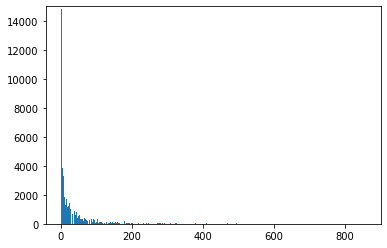

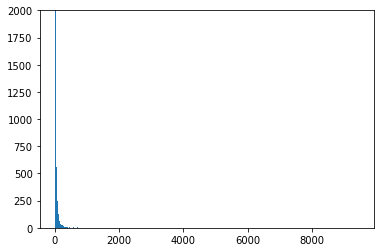

(array([1.95833e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.46200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.59500e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.90000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.39000e+02, 0.00000e+00, 0.00

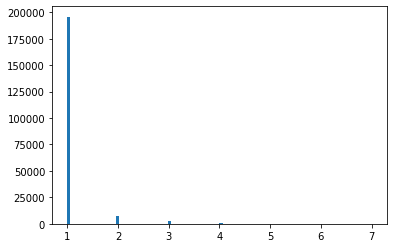

In [12]:
import json
import numpy as np
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/texts.json") as f:
    qid2text = {}
    for line in f:
        obj = json.loads(line)
        qid2text[obj["qid"]] = obj["sentences"]
# text
import scipy.stats as stats
print("# articles", len(qid2text))
num_sentences = []
length_sentences = []
for qid, texts in qid2text.items():
    num_sentences.append(len(texts))
    for text in texts:
        length_sentences.append(text.count(' '))

num_sentences = np.array(num_sentences)
print("num of sentence", stats.describe(num_sentences))
print("length sentence", stats.describe(length_sentences))

import matplotlib.pyplot as plt
plt.hist(num_sentences, bins=100)
plt.show()

import matplotlib.pyplot as plt
plt.hist([x for x in length_sentences if x < 1000], bins=200)
plt.show()

idx2statement = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[int(idx)] = eval(s)

from collections import Counter
statement2num_sentences = []
sentence2num_statements = []
num_positive_per_example = []
sentence_position = []
cnt = 1
with open("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/labels.json") as f:
    for line in f:
        if cnt < 0:
            break
        # cnt -= 1
        obj = json.loads(line)
        e1, e2 = obj["entity_pair"]
        _num_sent = {}
        _statement_set = set()
        num_positive_per_example.append(len(obj["positive_labels"]))
        for example in obj["positive_labels"]:
            
            sent_e1 = qid2text[e1][example[0]]
            sent_e2 = qid2text[e2][example[1]]

            # print("---")
            # print("sentence_e1:", sent_e1)
            # print("sentence_e2:", sent_e1)
            # _num_statement[f"{e1}_{example[0]}"].add
            # _num_statement[f"{e2}_{example[1]}"] += 1
            flag = False
            for statement_pair in example[2]:
            
                s1_idx = statement_pair[0]
                s2_idx = statement_pair[1] 
                if (s1_idx, s2_idx) in _statement_set:
                    continue
                else:
                    _statement_set.add((s1_idx, s2_idx))
                    flag = True # consider this sentence pair
              
                # print(idx2statement[s1_idx], idx2statement[s1_idx])
                score = statement_pair[2]
                if s1_idx not in _num_sent:
                    _num_sent[s1_idx] = set()
                if s2_idx not in _num_sent:
                    _num_sent[s2_idx] = set()
                
                _num_sent[s1_idx].add(f"{e1}_{example[0]}")
                _num_sent[s2_idx].add(f"{e2}_{example[0]}")
            if flag:
                sentence_position.append(int(example[0]))
                sentence_position.append(int(example[1]))
        for k,v in _num_sent.items():
            statement2num_sentences.append(len(v))
statement2num_sentences = np.array(statement2num_sentences)

print("statement2num_sentences:", stats.describe(statement2num_sentences))

print("count positive sentence pair per example", stats.describe(num_positive_per_example))
print("sentence position", stats.describe(sentence_position))

import matplotlib.pyplot as plt
plt.hist(sentence_position, bins=1000)
plt.ylim(0, 15000)
plt.show()

import matplotlib.pyplot as plt
plt.hist(num_positive_per_example, bins=1000)
plt.ylim(0, 2000)
plt.show()

import matplotlib.pyplot as plt
plt.hist(statement2num_sentences, bins=100)
# plt.show()

## Stats on statement pairs
- {e1, e2, p, v1, v2}

- {(e, p, v)}
- {e}
- {p}
- e freq
- p freq


#### define useful functions

In [1]:
def _lookup_qid2alias(qid):
    if len(qid) < 3:
        table_name = f"Q{int(qid[1]):02d}.tsv"
    else:
        table_name = f"Q{qid[1:3]}.tsv"
    record = None
    with open (dir_entity_aliases / table_name, 'r') as f:
        for line in f:
            if not line.startswith(qid):
                continue
            record = line.strip().split('\t')
            if record[0] == qid:
                return record[1].split('|sep|')
    return None

def _load_property2aliases(path):
    # from the property_aliases table
    pid2aliases = {}
    with open(path, 'r') as f:
        header = f.readline()
        assert header.strip().split('\t') == ["alias", "pid"]
        while True:
            line = f.readline()
            if len(line) == 0:
                break
            alias, pid = line.strip().split('\t')
            if pid not in pid2aliases:
                pid2aliases[pid] = []
            pid2aliases[pid].append(alias)
    return pid2aliases

#### prop, statement frequency

In [11]:
import json
from pathlib import Path
from collections import Counter

dir_entity_aliases = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/aliases_sorted")
path_prop_alias = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/property_aliases/0.tsv")
dir_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/")
dir_output = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/stats")

pid2alias = _load_property2aliases(path_prop_alias)
idx2statement = {}
with open (dir_data / "statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[idx] = eval(s)
prop2freq = Counter()
entity2freq = Counter()
entitypair2freq = Counter()
# value2freq = Counter()

statmentpair2freq = {}
prop2statement2freq = {}
with open (dir_data / "statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]
        freq = int(freq)
        prop2freq[s1[1]] += freq
        entity2freq[s1[0]] += freq
        entity2freq[s2[0]] += freq
        entitypair2freq[(s1[0], s2[0])] += freq
        # value2freq[s1[2]] += 1
        # if s1[2] != s2[2]:
        #     value2freq[s2[2]] += 1

        pair = (s1[0], s2[0], s1[1], s1[2], s2[2])
        statmentpair2freq[pair] = int(freq)
        if s1[1] not in prop2statement2freq:
            prop2statement2freq[s1[1]] = {}
        prop2statement2freq[s1[1]][pair] = freq

with open (dir_output / "top_statement_pairs.tsv", 'w') as f:
    f.write("alias\tfreq\n")
    for k,v in list(statmentpair2freq.items())[:10]:
        f.write(f"({_lookup_qid2alias(k[0])[0]},{_lookup_qid2alias(k[1])[0]}, {pid2alias[k[2]][0]}, {_lookup_qid2alias(k[3])[0]}, {_lookup_qid2alias(k[4])[0]})\t{v}\n")

# print("===\nMost popular properties:")
# for k,v in prop2freq.most_common(10):
#     print(v, k, pid2alias[k][0])

with open (dir_output / "entity2freq.tsv", 'w') as f:
    f.write("qid\tcount\n")
    for k,v in entity2freq.most_common():
        f.write(f"{k}\t{v}\n")

with open (dir_output / "entity2freqcount.tsv", 'w') as f:
    f.write("entity_freq\tcount\n")
    cnt = Counter()
    for k,v in entity2freq.most_common():
        cnt[v] += 1
    for k,v in cnt.most_common():
        f.write(f"{k}\t{v}\n")



with open (dir_output / "entitypair2freq.tsv", 'w') as f:
    f.write("qid-qid\tcount\n")
    for k,v in entitypair2freq.most_common():
        f.write(f"{k}\t{v}\n")

with open (dir_output / "entitypair2freqcount.tsv", 'w') as f:
    f.write("entity_pair_freq\tcount\n")
    cnt = Counter()
    for k,v in entitypair2freq.most_common():
        cnt[v] += 1
    for k,v in cnt.most_common():
        f.write(f"{k}\t{v}\n")

with open (dir_output / "top_entitiy_pairs.tsv", 'w') as f:
    f.write("qid-qid\tcount\n")
    for k,v in entitypair2freq.most_common(20):
        f.write(f"{k}\t{_lookup_qid2alias(k[0])[0]}\t{_lookup_qid2alias(k[1])[0]}\t{v}\n")


with open (dir_output / "top_entities.tsv", 'w') as f:
    f.write("qid\tcount\n")
    for k,v in entity2freq.most_common(20):
        f.write(f"{k}\t{_lookup_qid2alias(k)[0]}\t{v}\n")


# write stats
with open (dir_output / "prop2freq.tsv", 'w') as f:
    f.write("pid\talias\tcount\n")
    for k,v in prop2freq.most_common():
        f.write(f"{k}\t{pid2alias[k][0]}\t{v}\n")

with open (dir_output / "prop2freqcount.tsv", 'w') as f:
    f.write("prop_freq\tcount\n")
    cnt = Counter()
    for k,v in prop2freq.most_common():
        cnt[v] += 1
    for k,v in cnt.most_common():
        f.write(f"{k}\t{v}\n")
        

with open (dir_output / "prop_value_same_diff.tsv", 'w') as f:
    f.write(f"pid\talias\tsame\tdifferent\n")
    for prop,prop_freq in prop2freq.most_common():
        _pair2freq = prop2statement2freq[prop] # statement pair to frequency
        cnt_same = 0
        cnt_diff = 0
        for k,v in list(_pair2freq.items()):
            assert len(k) == 5
            if k[3] == k[4]:
                cnt_same += 1
            else:
                cnt_diff += 1
        f.write(f"{prop}\t{pid2alias[prop][0]}\t{cnt_same}\t{cnt_diff}\n")
        


In [ ]:
import json
from pathlib import Path
from collections import Counter

idx2statement = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[idx] = eval(s)
prop2freq = Counter()
statmentpair2freq = {}
prop2statement2freq = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]

        prop2freq[s1[1]] += int(freq)

        pair = (s1[0], s2[0], s1[1], s1[2], s2[2]) # (e1, e2, p, v1, v2)
        statmentpair2freq[pair] = int(freq)
        if s1[1] not in prop2statement2freq:
            prop2statement2freq[s1[1]] = {}
        prop2statement2freq[s1[1]][pair] = freq



In [ ]:
## relationship between wikidata, news and final data. Q-Q plot
from collections import Counter
prop2freq_wikidata = Counter()
prop2freq_matched = Counter()
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]
        prop2freq[s1[1]] += int(freq)

with open("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_analysis/Q5/pid2freq_rel.json") as f:
    pid2freq_wikidata = json.load(f)

for pid, freq_matched in prop2freq.most_common():
    print(freq_matched, pid2freq_wikidata[pid])

In [14]:
from collections import Counter
idx2statement = {}
with open (dir_data / "statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[idx] = eval(s)
entity2freq = Counter()
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]
        entity2freq[s1[0]] += int(freq)
        entity2freq[s2[0]] += int(freq)
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_analysis/Q5/entity2profile.json") as f:
    entity2profile = json.load(f)



{'P21': ['Q6581097'], 'P54': ['Q19446', 'Q18716', 'Q18732', 'Q204238', 'Q1110944', 'Q47762'], 'P106': ['Q937857', 'Q628099', 'Q2986228'], 'P31': ['Q5'], 'P19': ['Q1425428'], 'P166': ['Q10762848', 'Q12201477'], 'P27': ['Q145'], 'P735': ['Q294833'], 'P641': ['Q2736'], 'P1344': ['Q101730', 'Q161810', 'Q180563', 'Q131239'], 'P413': ['Q280658'], 'P69': ['Q5587198'], 'P734': ['Q37015944'], 'P118': ['Q9448'], 'P6087': ['Q18716'], 'P1412': ['Q1860']}
{'P19': ['Q216844'], 'P54': ['Q1422', 'Q204220', 'Q180305', 'Q7156', 'Q9617', 'Q9617', 'Q3590033', 'Q1450568', 'Q1450557', 'Q2701714', 'Q1344163', 'Q1277549', 'Q47774'], 'P106': ['Q937857', 'Q628099'], 'P166': ['Q10855271'], 'P31': ['Q5'], 'P27': ['Q142'], 'P735': ['Q18001848', 'Q14516546'], 'P734': ['Q5716947'], 'P641': ['Q2736'], 'P1344': ['Q176883', 'Q37285', 'Q47735', 'Q101730', 'Q102920', 'Q131239', 'Q241864'], 'P413': ['Q280658'], 'P26': ['Q1943226'], 'P910': ['Q55330826'], 'P1412': ['Q150'], 'P118': ['Q9448', 'Q18543', 'Q324867', 'Q15804', 

In [15]:
for qid, freq in entity2freq.most_common():
    profile = entity2profile[qid]
    freq_wikidata = 0
    for k,v in profile.items():
        freq_wikidata += len(v)
    
    print(f"{freq}\t{freq_wikidata}")

4395	27
3874	47
3777	90
3139	100
3030	32
2864	32
2808	39
2763	30
2708	35
2555	25
2465	34
2214	35
2181	35
2141	30
2136	31
2041	29
1966	36
1920	34
1896	31
1860	55
1845	96
1835	101
1805	14
1736	103
1708	34
1688	22
1685	55
1636	29
1609	75
1562	67
1554	42
1540	91
1513	67
1486	15
1479	18
1479	21
1479	16
1471	31
1341	33
1335	26
1272	47
1214	30
1196	334
1178	32
1170	28
1165	32
1153	63
1135	30
1118	23
1117	23
1090	29
1067	24
1058	131
1054	32
1039	36
1035	23
1029	34
1029	31
1015	42
1012	6
1009	10
1007	40
1007	6
1007	7
996	32
989	16
988	28
985	140
948	16
946	17
936	32
923	20
912	32
901	29
890	31
889	77
888	38
880	25
878	19
870	15
862	36
857	39
857	23
854	20
854	21
853	26
850	13
841	27
839	20
838	31
818	10
818	24
810	13
808	39
800	13
795	32
785	26
778	27
776	32
776	22
776	28
771	11
765	29
759	32
754	15
746	24
744	40
740	22
738	27
736	23
731	28
730	44
723	21
716	31
714	34
709	49
706	30
702	27
700	10
692	29
688	94
684	41
673	23
670	38
669	28
667	21
661	20
658	23
654	31
650	25
645	39
642	16
636	27
63

In [ ]:
import json
from collections import Counter
entity2freq = Counter()
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/labels.json") as f:
    for line in f:
        obj = json.loads(line)
        e1, e2 = obj["entity_pair"]
        for item in obj["positive_labels"]:
            entity2freq[e1] += 1
            entity2freq[e2] += 1
cnt = Counter()
for k,v in entity2freq.items():
    cnt[v] += 1
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/stats/entity_freq.tsv", 'f') as f:
    f.write("entity_freq\tfreq\n") 
    for k,v in cnt.items():
